# Data cleaning

##  Imports

In [2]:
%load_ext autoreload
%autoreload 2

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data manipulation
%matplotlib inline
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
#import seaborn as sns

# Set font scale and style
#sns.set(font_scale = 1.5)
#sns.set_style('ticks')
#sns.set()

##  Load original data

In [3]:
data = pd.read_csv('/home/siro/Downloads/NCDB_1999_to_2016 (1).csv')
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [4]:
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753


Please note that in each attribute the values with U, UU, UUU, UUUU represent Unknown. X, XX, XXX, XXXX represent Jurisdiction does not provide this data element. Q, QQ, QQQ, QQQQ represent Choice is other than the preceding values.  N, NN, NNN, NNNN represent Data element is not applicable. Please see the explanatory docx file in the Data folder for a full explanation of the attributes and their values.

In [5]:
# Data size
data.shape

(6486831, 23)

The data file is very big, so we will avoid creating copies of the files to effectively manage the memory

In [6]:
# Rename the class variable
data.rename(columns = {'C_SEV':'FATAL'}, inplace=True)

In [7]:
# Drop duplicate rows
data.drop_duplicates(inplace=True) 

In [8]:
# Data size after removing duplicate rows
data.shape

(6486039, 23)

In [9]:
# Data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6486039 entries, 0 to 6486830
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
FATAL     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


- There are only 3 numerical attributes out of 23 attributes.

The data show no missing values because some of the attributes contain inconsistent formats like U, X, N, and Q as stated above. 

In [10]:
# Replace letters with numpy nan
letter_list = ['U', 'UU', 'UUU', 'UUUU', 'Q', 'QQ', 'QQQ', 'QQQQ', 
               'N', 'NN', 'NNN', 'NNNN', 'X', 'XX', 'XXX', 'XXXX']
data.replace(letter_list, np.nan, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6486039 entries, 0 to 6486830
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
FATAL     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


In [14]:
# Percentage of missing values
percentage_missing_values = (data.isnull().sum()/data.shape[0])*100

# Create a dataframe of missing values
Missing_df = pd.DataFrame({'Variable': percentage_missing_values.index, 
                          'Percentage Missing': percentage_missing_values.values})
Missing_df.sort_values(by = 'Percentage Missing', ascending = False)

,Variable,Percentage Missing
20,P_SAFE,21.140406
7,C_RCFG,10.758353
14,V_YEAR,9.883675
6,C_CONF,7.968931
10,C_RALN,7.642153
17,P_AGE,6.784480
19,P_ISEV,6.423782
11,C_TRAF,5.279879
13,V_TYPE,4.868303
16,P_SEX,4.455369


- Indeed, there are lots of missing values in the attributes.

- P_SAFE has the largest percentage of missing values followed by C_RCFG

- There are no missing values in C_YEAR,  C_CASE, and FATAL (class variable), 

##  Convert variables to the correct format

Based on the data information, there are many categorical variables encoded as numbers. We will now convert them  to the correct description to better understand the data

### Day of week

In [15]:
data.C_WDAY.unique()

array([1, 2, 3, 4, 5, 6, 7, '7', nan, '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [16]:
week_dict = {'1': 'Monday','2': 'Tuesday','3':'Wednesday','4':'Thursday',
             '5':'Friday', '6': 'Saturday', '7':'Sunday',1: 'Monday',2: 'Tuesday',3:'Wednesday',
             4:'Thursday',5:'Friday', 6: 'Saturday', 7:'Sunday'} 

In [17]:
data['C_WDAY'].replace(week_dict, inplace=True) 

In [18]:
data.C_WDAY.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', nan], dtype=object)

### Month of the year

In [19]:
data.C_MNTH.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '12', nan, '01', '02', '11'],
      dtype=object)

In [20]:
month_dict = {1: 'January', '01': 'January', 2: 'February','02': 'February',3: 'March', 4: 'April',
             5:'May', 6: 'June', 7: 'July',8: 'August', 9: 'September',10: 'october', 11: 'November',
              '11': 'November', 12: 'December', '12': 'December'}

In [21]:
data['C_MNTH'].replace(month_dict, inplace=True)

In [22]:
data.C_MNTH.value_counts()

August       604158
July         595417
December     580687
June         574934
october      570857
September    567737
January      553744
November     552902
May          518120
February     472584
March        460784
April        433712
Name: C_MNTH, dtype: int64

In [24]:
data.C_MNTH.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'october', 'November', 'December', nan],
      dtype=object)

- Also the months are encoded as integers  ranging from 1 to 12

### Collision hour

In [23]:
data.C_HOUR.unique()

array(['20', '08', '17', '15', '14', '01', '11', '13', '19', '16', '09',
       '02', '18', '12', '10', '23', '00', '06', '07', '21', nan, '05',
       '22', '03', '04'], dtype=object)

We will convert hour to numeric

In [28]:
data['C_HOUR'] = pd.to_numeric(data['C_HOUR'], errors = 'coerce', downcast='integer')

In [29]:
data.C_HOUR.dtypes

dtype('float64')

### Number of vehicles involved in collision

In [30]:
data.C_VEHS.unique()

array(['02', '01', '03', '04', '06', '07', '09', nan, '05', '13', '08',
       '12', '14', '10', '11', '16', 1, 2, 3, 4, 5, 6, 8, 7, 12, 10, '26',
       '71', 19, 25, 9, '21', '27', '15', '35', 15, 13, 26, '22', '41',
       27, 46, 31, 11, '18', 18, 56, '23', 36, 17, 14, 20, 21, '19', 16,
       '29', '25', 77, 28, 38, '38', '17', '32', 35, 22, 33, '54', 72,
       '40', 44, 58, '30', '77', '20', '24', '34', 24, 39, '51', 57, 43,
       37, 47], dtype=object)

The number of vehicles involved in an accident contains inconsistent numbering, e.g '01', '02', and so on. We  will correct this typos and convert the attribute to numeric

In [31]:
data['C_VEHS'].replace(['01','02','03','04','05','06','07','08','09'], [1,2,3,4,5,6,7,8,9], inplace=True)

In [32]:
data['C_VEHS'] = pd.to_numeric(data['C_VEHS'], errors = 'coerce', downcast='integer')

In [33]:
data.C_VEHS.dtypes

dtype('float64')

### Collision configuration

In [34]:
data.C_CONF.unique()

array(['34', '01', nan, '04', '31', '21', '23', '03', '02', '33', '24',
       '35', '41', '06', '32', '36', '05', '22', '25'], dtype=object)

In [35]:
coll_dict = {'01': 'Hit a moving object', '02': 'Hit a stationary object', '03': 'Ran off left shoulder',
                 '04': 'Ran off right shoulder', '05': 'Rollover on roadway', '06': 'Any other single-vehicle ',
                 '34': 'Right turn', '31': 'Head-on collision', '21': 'Rear-end collision', 
                  '23': 'left turn conflict', '33': 'Left turn across opposing traffic',
                 '24': 'right turn conflict', '35': 'Right angle collision', '41': 'Hit a parked motor vehicle',
                 '32': 'Approaching side-swipe', 
                  '36': 'Any other two-vehicle - different direction', '22': 'Side swipe', 
                  '25': 'Any other two-vehicle - same direction'}

In [36]:
data['C_CONF'].replace(coll_dict, inplace=True)

In [37]:
data.C_CONF.value_counts()

Rear-end collision                             1962043
Right angle collision                           954604
Any other single-vehicle                        571376
Any other two-vehicle - different direction     488437
Left turn across opposing traffic               467300
Ran off right shoulder                          235557
Side swipe                                      217768
Head-on collision                               212938
Hit a stationary object                         210635
Ran off left shoulder                           180425
Hit a moving object                              97890
Hit a parked motor vehicle                       89528
left turn conflict                               76472
Right turn                                       65420
right turn conflict                              57672
Approaching side-swipe                           53564
Rollover on roadway                              14708
Any other two-vehicle - same direction           12834
Name: C_CO

### Roadway configuration

In [38]:
data.C_RCFG.unique()

array([nan, '01', '02', '03', '05', '04', '06', '08', '07', '09', '10'],
      dtype=object)

In [39]:
roadway_dict = {'01': 'Non-intersection', '02':'At an intersection', 
                '03': 'Intersection with parking lot entrance', '04': 'Railroad level crossing',
               '05': 'Bridge, overpass, viaduct', '06': 'Tunnel or underpass', '07': 'Passing or climbing lane',
               '08': 'Ramp', '09': 'Traffic circle', '10': 'Express lane of a freeway system'}

In [40]:
data['C_RCFG'].replace(roadway_dict, inplace=True)

In [41]:
data.C_RCFG.value_counts()

At an intersection                        3033494
Non-intersection                          2334306
Intersection with parking lot entrance     313855
Bridge, overpass, viaduct                   56743
Railroad level crossing                     25496
Ramp                                        13628
Tunnel or underpass                          6685
Traffic circle                               2337
Passing or climbing lane                     1095
Express lane of a freeway system              609
Name: C_RCFG, dtype: int64

### Weather condition

In [42]:
data.C_WTHR.unique()

array(['1', '5', '3', '4', '7', '2', nan, '6'], dtype=object)

In [43]:
weather_dict = {'1': 'Clear and sunny', '2': 'Overcast, cloudy but no precipitation', '3': 'Raining',
            '4': 'Snowing', '5': 'Freezing rain, sleet, hail', '6': 'Visibility limitation', '7': 'Strong wind'}

In [44]:
data['C_WTHR'].replace(weather_dict, inplace=True)

In [45]:
data.C_WTHR.value_counts()

Clear and sunny                          4528675
Overcast, cloudy but no precipitation     659229
Raining                                   655347
Snowing                                   389070
Visibility limitation                      91543
Freezing rain, sleet, hail                 33459
Strong wind                                16826
Name: C_WTHR, dtype: int64

### Road surface

In [46]:
data.C_RSUR.unique()

array(['5', '3', '2', '4', '1', '6', nan, '7', '9', '8'], dtype=object)

In [47]:
roadsurface_dict = {'1':'Dry, normal', '2': 'Wet', '3': 'Snow', '4':'Slush', '5': 'Icy', '6':'Sand/gravel/dirt',
               '7':'Muddy', '8': 'Oil', '9': 'Flooded'}

In [49]:
data['C_RSUR'].replace(roadsurface_dict, inplace=True)

In [50]:
data.C_RSUR.value_counts()

Dry, normal         4279083
Wet                 1182990
Icy                  355141
Snow                 284284
Slush                 81143
Sand/gravel/dirt      27905
Muddy                  6472
Oil                    1331
Flooded                 410
Name: C_RSUR, dtype: int64

### Road alignment

In [51]:
data.C_RALN.unique()

array(['3', '6', '1', nan, '2', '5', '4'], dtype=object)

In [52]:
roadall_dist = {'1':'Straight and level', '2':'Straight with gradient', '3': 'Curved and level',
               '4':'Curved with gradient', '5': 'Top of hill or gradient', '6': 'Bottom of hill or gradient'}

In [54]:
data['C_RALN'].replace(roadall_dist, inplace=True)

In [55]:
data.C_RALN.value_counts()

Straight and level            4631514
Straight with gradient         639069
Curved and level               398260
Curved with gradient           243465
Top of hill or gradient         45034
Bottom of hill or gradient      33024
Name: C_RALN, dtype: int64

### Traffic control

In [56]:
data.C_TRAF.unique()

array(['03', '18', '01', nan, '06', '10', '05', '04', '11', '07', '08',
       '16', '17', '02', '13', '15', '09', '12'], dtype=object)

In [58]:
tracon_dict ={'01': 'Traffic signals fully operational', '02': 'Traffic signals in flashing mode',
             '03': 'Stop sign', '04': 'Yield sign', '05':'Warning sign', '06':'Pedestrian crosswalk',
             '07': 'Police officer', '08': 'School guard, flagman', '09': 'School crossing',
              '10': 'Reduced speed zone', '11': 'No passing zone sign', '12': 'Markings on the road',
             '13': 'School bus stopped with school bus signal lights flashing',
             '15':'Railway crossing with signals, or signals and gates',
             '16': 'Railway crossing with signs only',
             '17': 'Control device not specified', '18': 'No control present'}
data['C_TRAF'].replace(tracon_dict, inplace=True)

In [59]:
data.C_TRAF.value_counts()

No control present                                           3376140
Traffic signals fully operational                            1813663
Stop sign                                                     721588
Yield sign                                                    100806
Pedestrian crosswalk                                           50588
School guard, flagman                                          26805
Traffic signals in flashing mode                               21230
School bus stopped with school bus signal lights flashing       4714
Warning sign                                                    4432
Control device not specified                                    4383
Railway crossing with signals, or signals and gates             4280
Markings on the road                                            4087
No passing zone sign                                            3656
Reduced speed zone                                              3076
Police officer                    

### Vehicle sequence number

In [ ]:
data.V_ID.unique()

There is a mismatch in the vehicle sequence number, e.g. '01' is 1, '02' is 2 and so on

In [60]:
data['V_ID'].replace(['01','02','03','04','05','06', '07','08','09'],  [1,2,3,4,5,6,7,8,9], inplace=True)

In [61]:
# Convert to numeric
data['V_ID'] = pd.to_numeric(data['V_ID'], errors ='coerce', downcast='integer')

### Vehicle type

In [62]:
data.V_TYPE.unique()

array(['06', '01', nan, '11', '20', '17', '07', '08', '09', '22', '14',
       '23', '05', '16', '19', '18', '10', '21'], dtype=object)

In [63]:
vehtype_dict ={'01': 'Light Duty Vehicle', '06': 'Other trucks and vans', '11': 'Urban and Intercity Bus',
              '20': 'Construction equipment', '17': 'Bicycle', '07': 'Unit trucks', '08': 'Road tractor',
              '09': 'School bus', '22': 'Snowmobile', '14': 'Motorcycle and moped', '23': 'Street car',
              '05': 'Panel/cargo van', '16': 'Off road vehicles', 
               '19': 'Farm equipment', '18': 'Purpose-built motorhome',
              '10': 'Smaller school bus', '21': 'Fire engine'}
data['V_TYPE'].replace(vehtype_dict, inplace=True)

In [64]:
data.V_TYPE.value_counts()

Light Duty Vehicle         5344813
Other trucks and vans       187446
Motorcycle and moped        137563
Bicycle                     136504
Unit trucks                  97033
Road tractor                 77590
Panel/cargo van              72826
Urban and Intercity Bus      57418
School bus                   24084
Off road vehicles            10745
Construction equipment        8387
Snowmobile                    4890
Purpose-built motorhome       3426
Street car                    3373
Farm equipment                2220
Smaller school bus            1057
Fire engine                    904
Name: V_TYPE, dtype: int64

### Vehicle model year

In [65]:
data.V_YEAR.unique()

array(['1990', '1987', '1986', nan, '1984', '1991', '1992', '1997',
       '1993', '1985', '1988', '1994', '1995', '1998', '1989', '1996',
       '1983', '1999', '1965', '1977', '1978', '1968', '1981', '1979',
       '1976', '1972', '2000', '1982', '1975', '1973', '1974', '1980',
       '1967', '1970', '1971', '1962', '1969', '1966', '1945', '1963',
       '1960', '1950', '1964', '1959', '1955', '1958', '1903', '1909',
       '1949', '1923', '1961', '1914', '1908', '1953', '1906', '1939',
       '1925', '1948', '1938', '1907', '1952', '1904', '1917', '1912',
       '1944', '1956', '1930', '1931', '1951', '1946', '1947', '1957',
       '1954', '1943', '1901', '1937', '1905', '1935', '1926', '1941',
       '1932', '1920', '1933', '1919', '1915', '1929', '1928', '2001',
       '1913', '1940', '1927', '2002', '1916', '1942', '1918', '2003',
       '1924', '1922', '1934', '2004', '2005', '2006', '2007', '2008',
       '1911', '2009', '2010', '2011', '1936', '2012', '1910', '1921',
       '2

In [66]:
# Convert to numeric
data['V_YEAR'] = pd.to_numeric(data['V_YEAR'], errors = 'coerce', downcast='integer')

In [67]:
data['V_YEAR'].value_counts().head()

2000.0    336784
2002.0    315642
2003.0    307533
1998.0    303402
1999.0    296905
Name: V_YEAR, dtype: int64

### Person sequence ID

In [68]:
data.P_ID.unique()

array(['01', '02', '03', '04', '05', '06', nan, '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '99'], dtype=object)

In [69]:
data['P_ID'].replace(['01', '02','03','04','05','06','07','08','09'], [1,2,3,4,5,6,7,8,9], inplace=True)

In [70]:
data['P_ID'] = pd.to_numeric(data['P_ID'], errors = 'coerce', downcast='integer')

In [71]:
data.P_ID.dtypes

dtype('float64')

### Gender

In [72]:
data.P_SEX.unique()

array(['M', 'F', nan], dtype=object)

In [73]:
data.P_SEX.value_counts()

M    3490061
F    2707001
Name: P_SEX, dtype: int64

- More males are involved in vehicle collision than females

### Person age

In [74]:
data.P_AGE.unique()

array(['41', '19', '20', '46', '05', '28', '21', nan, '61', '56', '34',
       '22', '30', '49', '32', '31', '68', '08', '45', '17', '33', '82',
       '39', '37', '55', '38', '43', '35', '23', '25', '65', '44', '36',
       '70', '50', '40', '27', '26', '15', '53', '16', '13', '14', '12',
       '18', '77', '86', '42', '24', '47', '62', '06', '57', '83', '74',
       '67', '51', '29', '01', '02', '54', '71', '10', '79', '63', '58',
       '48', '60', '07', '64', '75', '52', '85', '93', '92', '69', '72',
       '11', '59', '09', '66', '76', '73', '04', '78', '80', '84', '03',
       '81', '89', '87', '88', '90', '91', '95', '97', '94', '99', '98',
       '96'], dtype=object)

In [75]:
data['P_AGE'].replace(['01','02','03','04', '05', '06','07','08','09'], [1,2,3,4,5,6,7,8,9], inplace=True)

In [76]:
data['P_AGE'] = pd.to_numeric(data['P_AGE'], errors = 'coerce', downcast='integer')

In [77]:
data.P_AGE.dtypes

dtype('float64')

### Person position

In [78]:
data.P_PSN.unique()

array(['11', '13', '99', '23', '98', '21', '22', '12', nan, '96', '32',
       '31', '33', '97'], dtype=object)

In [79]:
perpos_dict = {'11': 'Driver', '13': 'Front row, right outboard',
               '99': 'Pedestrian', '23': 'Second row, right outboard',
              '98': 'Outside passenger compartment', '21': 'Second row, left outboard',
              '22': 'Second row, center', '12': 'Front row, center', '96': 'Position unknown',
              '32': 'Third row, center', '31': 'Third row, left outboard',
              '33': 'Third row, right outboard', '97': 'Sitting on someone’s lap'}

data['P_PSN'].replace(perpos_dict, inplace=True)

In [80]:
data.P_PSN.value_counts()

Driver                           4346086
Front row, right outboard         965488
Second row, right outboard        283557
Second row, left outboard         237432
Pedestrian                        233121
Second row, center                 97167
Front row, center                  94171
Position unknown                   49937
Third row, center                  32422
Outside passenger compartment       7203
Third row, right outboard           6626
Third row, left outboard            5221
Sitting on someone’s lap             281
Name: P_PSN, dtype: int64

### Medical treatment required

In [81]:
data.P_ISEV.unique()

array(['1', '2', '3', nan], dtype=object)

In [82]:
med_dict = {'1': 'No Injury', '2': 'Injury', '3': 'Fatality'}
data['P_ISEV'].replace(med_dict, inplace=True)

In [83]:
data.P_ISEV.value_counts()

Injury       3399047
No Injury    2626176
Fatality       44167
Name: P_ISEV, dtype: int64

### Safety device used

In [84]:
data.P_SAFE.unique()

array([nan, '02', '01', '13', '12', '09', '10', '11'], dtype=object)

In [85]:
safe_dict = {'02': 'Safety device used', '01': 'No safety device used', '13': 'No safety device equipped',
            '12': 'Other safety device used', '09': 'Helmet worn', '10': 'Reflective clothing worn',
            '11': 'Both helmet and reflective clothing used'}
data['P_SAFE'].replace(safe_dict, inplace=True)

In [86]:
data.P_SAFE.value_counts()

Safety device used                          4604757
No safety device used                        214470
No safety device equipped                    156196
Helmet worn                                  113051
Other safety device used                      26188
Reflective clothing worn                        188
Both helmet and reflective clothing used         14
Name: P_SAFE, dtype: int64

### Road user class

In [87]:
data.P_USER.unique()

array(['1', '2', '3', nan, '4', '5'], dtype=object)

In [88]:
roaduser_dict = {'1': 'Motor Vehicle Driver', '2': 'Motor Vehicle Passenger', '3': 'Pedestrian',
                '4': 'Bicyclist', '5': 'Motorcyclist'}
data['P_USER'].replace(roaduser_dict, inplace=True)

In [89]:
data.P_USER.value_counts()

Motor Vehicle Driver       4048891
Motor Vehicle Passenger    1706890
Pedestrian                  246085
Motorcyclist                137563
Bicyclist                   136504
Name: P_USER, dtype: int64

### Class Distribution

In [90]:
data.FATAL.unique()

array([2, 1])

In [91]:
data.FATAL.value_counts()

2    6378054
1     107985
Name: FATAL, dtype: int64

 The class is encoded as integers 1 and 2, where 1 represents fatal accidents and 2 represents non-fatal accidents. It is useful to recode the class variable as a binary class, where we replace 2 with 0.

In [92]:
data['FATAL'].replace(2, 0, inplace=True) 
data['FATAL'].value_counts()

0    6378054
1     107985
Name: FATAL, dtype: int64

(-0.49, 1.49, 0.0, 6696956.7)

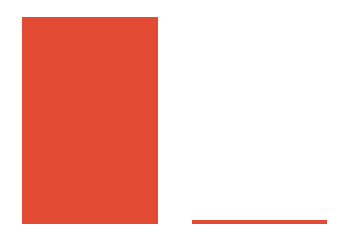

In [98]:
# Set figure font
#sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot bar
#df['FATAL'].value_counts().plot(kind = 'bar', figsize = (8,5), color ='b')
plt.bar(['Fatal', 'Non-fatal'], data['FATAL'].value_counts())
plt.xlabel('Class', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.axis('off')

 Let's look at the percentage of the class distribution

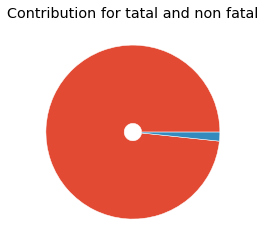

In [104]:
fig, ax = plt.subplots()
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
size = 0.9
v = np.array([98.335116, 1.664884])

ax.pie(v, radius=1, 
       wedgeprops=dict(width=size, edgecolor='w'))


ax.set(aspect="equal", title='Contribution for tatal and non fatal')
plt.show()


In [99]:
(data['FATAL'].value_counts()/data.shape[0])*100 

0    98.335116
1     1.664884
Name: FATAL, dtype: float64

- This is an extremely imbalanced class problem, where the class of interest (in this case fatal accidents) is extremely small compared to the other class 

- The majority (negative) class contains 98% of the class distribution, whereas the minority (positive) class is only 2% of the class distribution. 

We will fill the nan with the mode, so that we don't reduce useful information

In [106]:
data_mode = data.mode()

In [123]:
nan_replace = {key: val for key, val in zip(data.columns.values, data_mode.values[0])}

In [124]:
nan_replace

{'C_YEAR': 2000,
 'C_MNTH': 'August',
 'C_WDAY': 'Friday',
 'C_HOUR': 16.0,
 'FATAL': 0,
 'C_VEHS': 2.0,
 'C_CONF': 'Rear-end collision',
 'C_RCFG': 'At an intersection',
 'C_WTHR': 'Clear and sunny',
 'C_RSUR': 'Dry, normal',
 'C_RALN': 'Straight and level',
 'C_TRAF': 'No control present',
 'V_ID': 1.0,
 'V_TYPE': 'Light Duty Vehicle',
 'V_YEAR': 2000.0,
 'P_ID': 1.0,
 'P_SEX': 'M',
 'P_AGE': 18.0,
 'P_PSN': 'Driver',
 'P_ISEV': 'Injury',
 'P_SAFE': 'Safety device used',
 'P_USER': 'Motor Vehicle Driver',
 'C_CASE': 1707598}

In [125]:
data.fillna(nan_replace, inplace=True)

In [127]:
# Save as csv dataframe
data.to_csv('/home/siro/Downloads/clean_data.csv', index=False)